In [1]:
import tweepy
import time
import csv
import pandas as pd


consumer_key= 'insert'
consumer_secret= 'insert'
access_token= 'insert'
access_token_secret= 'insert'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

In [9]:
limit = 3000
language = 'en' 
keywords = 'I put name starbucks'
startDate = "2022-07-29"
endDate = "2022-08-04"


# Passing the parameters into the Cursor constructor method
public_tweets = tweepy.Cursor( api.search,
                                q= keywords,
                                result_type='recent',
                                since = startDate,
                                until = endDate,
                                count=100,
                                include_entities=True,
                                lang=language,
                                tweet_mode="extended",
                                encoding='utf-8-sig').items(limit)

In [10]:
tweet_id_list = []
tweet_text_list = []
tweet_location_list = []
user_screen_name_list = []
tweet_created_list = []
tweet_contributors_list = []
tweet_retweet_count_list = []
tweet_source_list = []
tweet_username_list = []


# Iterating through the results to extract the results
for tweet in public_tweets:
    tweet_id_list.append(tweet.id)
    tweet_text_list.append(tweet.full_text)
    tweet_location_list.append(tweet.user.location)
    user_screen_name_list.append(tweet.user.screen_name)
    tweet_source_list.append(tweet.source)
    tweet_created_list.append(tweet.created_at)
    tweet_contributors_list.append(tweet.id_str)
    tweet_retweet_count_list.append(tweet.retweet_count)
    tweet_username_list.append(tweet.user.name)

# Creating a Pandas dataframe to organize the data into a table
df = pd.DataFrame({
    'tweet_id': tweet_id_list,
    'tweet_text': tweet_text_list,
    'tweet_location': tweet_location_list,
    'user_screen': user_screen_name_list,
    'tweet_source': tweet_source_list,
    'tweet_created': tweet_created_list,
    'tweet_contributors': tweet_contributors_list,
    'tweet_retweet_count': tweet_retweet_count_list,
    'tweet_username': tweet_username_list})

In [11]:
def cleanUpTweet(txt):
  txt = re.sub(r'@[A-Za-z0-9_]+', '',txt)
  txt = re.sub(r'#', '', txt)
  txt = re.sub(r'https?:\/\/[A-Aa-a0-9\.\/]+', '', txt)
  return txt

In [12]:
df.to_csv('starbucks.csv', sep=',', index=False, encoding='utf-8-sig')

# Saving the file to Google drive

file_name = "starbucks.csv"

In [13]:
data =pd.read_csv("starbucks.csv")

In [14]:
data.shape

(3000, 9)

In [18]:
data.head()

,tweet_id,tweet_text,tweet_location,user_screen,tweet_source,tweet_created,tweet_contributors,tweet_retweet_count,tweet_username
0,1554979938310262786,RT @yunalesmis: YALL‼️ So I put “Yuna Kim” as ...,he/she/they 18,h0neyuzu,Twitter for iPhone,2022-08-03 23:58:02,1554979938310262786,38,🌸 𝐨𝐬𝐜(4)𝐚𝐫/loves yuzu no matter what🌸
1,1554979289002491904,RT @harajukubarbae: YALL‼️ so i put ‘COLLEGE D...,Beyoncé's uterus,lilgereli,Twitter for Android,2022-08-03 23:55:27,1554979289002491904,15,stream Renaissance by Beyoncé!!
2,1554979145851043840,RT @huekaiboo: YALL‼️ So I put ‘run away’ as m...,she they 18 enfp,huekamalkai,Twitter for iPhone,2022-08-03 23:54:53,1554979145851043840,1,naz
3,1554978850106392576,RT @maunobanx: YALL‼️ So I put ‘Liar’ as my na...,NaN,soyeonsation,Twitter for iPhone,2022-08-03 23:53:42,1554978850106392576,46,Ale | ( )I-DLE
4,1554978550951854081,RT @sapphireandrose: i put my name as “simon e...,NaN,takemyhandkar,Twitter for iPhone,2022-08-03 23:52:31,1554978550951854081,3,Karla Ruiz


In [19]:
import re

In [20]:
def cleaner(txt):
  txt = re.sub(r'@[A-Za-z0-9_]+', '',txt)
  txt = re.sub(r'#', '', txt)
  txt = re.sub(r'RT : ', '', txt)
  txt = re.sub(r'https?:\/\/[A-Aa-a0-9\.\/]+', '', txt)
  return txt

data["clean"] = data["tweet_text"].map(lambda x: cleaner(x))

In [25]:
data.tail()

,tweet_id,tweet_text,tweet_location,user_screen,tweet_source,tweet_created,tweet_contributors,tweet_retweet_count,tweet_username,clean
2995,1554540358465363969,RT @manafjs: YALL⁉️‼️So | put 'mana' as my nam...,NaN,Tet51168914,Twitter Web App,2022-08-02 18:51:18,1554540358465363969,533,Tet,YALL⁉️‼️So | put 'mana' as my name in Starbuck...
2996,1554540115397066753,"RT @chaersleftleg: YALL OMG so i put ""GUESS WH...",desi fr 💖💖,joysfmr,Twitter for iPhone,2022-08-02 18:50:20,1554540115397066753,267,aishwaryaa IS GONNA SEE HER YEJI ♡,"YALL OMG so i put ""GUESS WHO"" as my name in st..."
2997,1554540049064251392,RT @BeOurLuxury: YALL‼️ So I put ‘leah’ as my ...,"Boston, MA",DawnJuanPaco,Twitter for iPhone,2022-08-02 18:50:04,1554540049064251392,67,Dawn Juan Paco #SaveTheWilds,YALL‼️ So I put ‘leah’ as my name in Starbucks...
2998,1554540043984945153,RT @seesawsew: YALL‼️ So I put ‘Colors’ as my ...,16 south asian,iHeartChoerry,Twitter Web App,2022-08-02 18:50:03,1554540043984945153,519,Sarah,YALL‼️ So I put ‘Colors’ as my name in Starbuc...
2999,1554539988049698816,RT @jiumybeloved: YALL‼️ So I put ‘Starlight’ ...,NaN,shewhomeddles,Twitter for iPhone,2022-08-02 18:49:49,1554539988049698816,189,la maison la la la maison 🌱,YALL‼️ So I put ‘Starlight’ as my name in Star...


In [49]:
data[[ "clean", "tweet_retweet_count"]].head(10)

,clean,tweet_retweet_count
0,YALL‼️ So I put “Yuna Kim” as my name in Starb...,38
1,YALL‼️ so i put ‘COLLEGE DROPOUT’ as my name i...,15
2,YALL‼️ So I put ‘run away’ as my name in Starb...,1
3,YALL‼️ So I put ‘Liar’ as my name in Starbucks...,46
4,i put my name as “simon eriksson” for my starb...,3
5,YALL‼️ So I put ‘Daisy’ as my name in Starbuck...,106
6,YALL‼️ So I put ‘Daisy’ as my name in Starbuck...,106
7,YALL‼️ So I put “Yuzuru Hanyu” as my name in S...,319
8,YALL‼️ So I put ‘Yuna Kim’ as my name in Starb...,4
9,"YALL ‼️ So I put ""Morgan Hurd"" as my name in S...",4


In [28]:
import matplotlib.pyplot as plt
import numpy as np

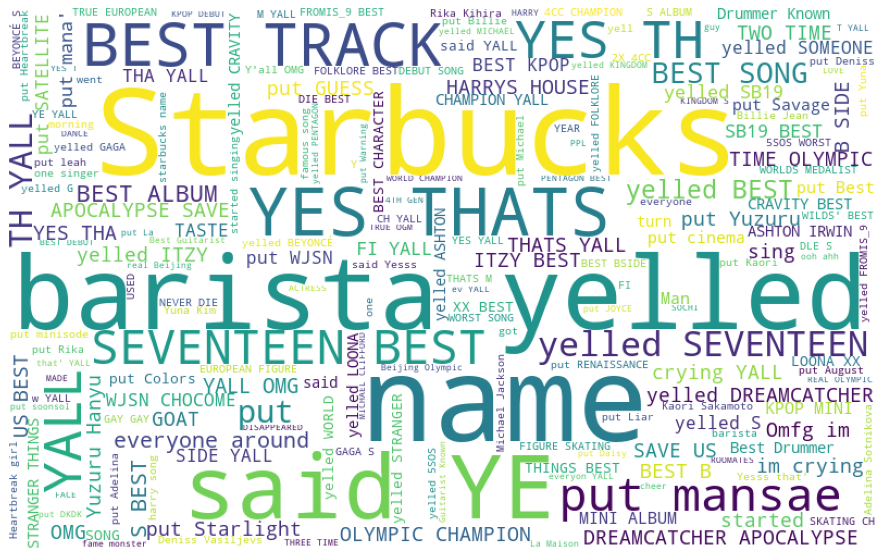

In [29]:
all_words = ' '.join([text for text in data['clean']])
from wordcloud import WordCloud
wordcloud = WordCloud(background_color = 'white', width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure( figsize=(20,10) )
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [67]:
from google.colab import files
from PIL import Image

uploaded = files.upload()

Saving star3.png to star3.png


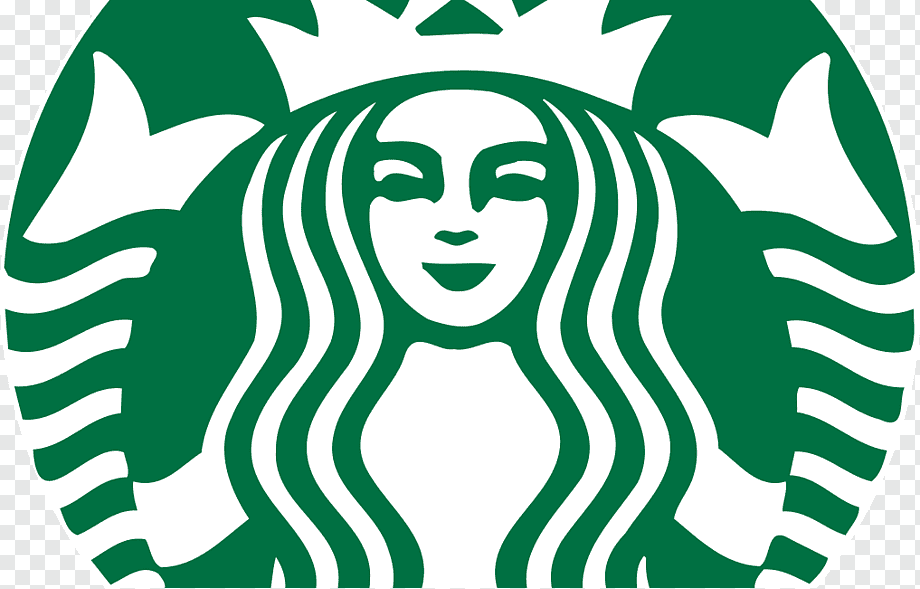

In [68]:
from IPython.display import Image
Image("star3.png")

In [69]:
star_mask = np.array(Image("star3.png"))
star_mask

array(<IPython.core.display.Image object>, dtype=object)

In [70]:
import numpy
import PIL

img = PIL.Image.open("star3.png").convert("L")
imgarr = numpy.array(img) 

In [71]:
imgarr

array([[255, 255, 255, ..., 230, 230, 230],
       [255, 255, 255, ..., 230, 230, 230],
       [255, 255, 255, ..., 230, 230, 230],
       ...,
       [230, 230, 230, ..., 255, 255, 255],
       [230, 230, 230, ..., 255, 255, 255],
       [230, 230, 230, ..., 255, 255, 255]], dtype=uint8)

In [36]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

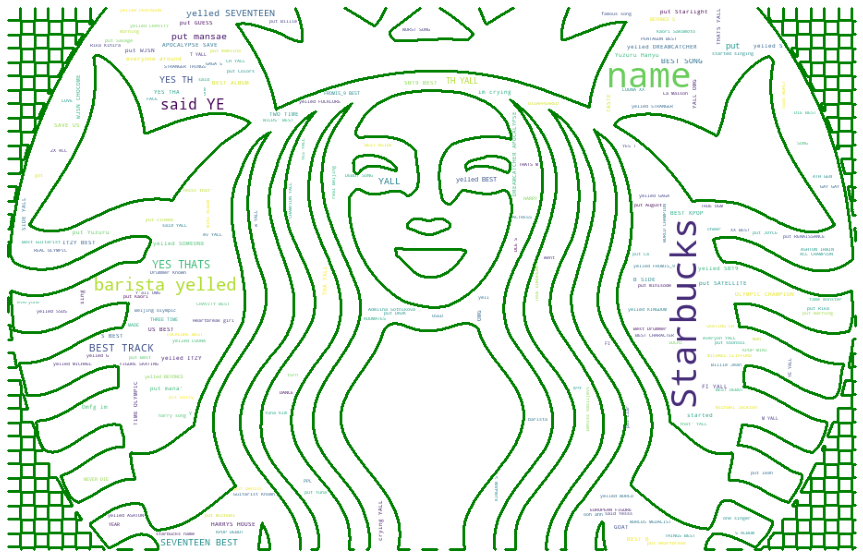

In [87]:
all_words = ' '.join([text for text in data['clean']])
from wordcloud import WordCloud
mask = np.array(Image('star3.png'))
wordcloud = WordCloud(background_color='white', mask=imgarr, contour_width=3, contour_color='green').generate(all_words)


plt.figure( figsize=(20,10) )
plt.imshow(wordcloud)
plt.axis("off")
plt.show()